In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm
from IPython.display import HTML

In [4]:
Nt = 1000
Nx = 50
x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)
D=0.01
a=0.2
b=0.3
epsilon_=0.03

deltax = x[1] - x[0]
deltat = t[1] - t[0]

def v0(a):
    return np.random.uniform(0.0,0.3)

lambda_ = (D*deltat)/deltax**2
print(lambda_)

0.2403403403403404


In [5]:
def h1(t):
    return 0.1
def h2(t):
    return 0.2

In [6]:
def initT():
    T = np.zeros((Nt,Nx))
    for i in range(len(x)):
        T[0,i] = v0(x[i])

    T[:,0] = h1(t[0])
    T[:,-1] = h2(t[0])
    return T

In [7]:
def initW():
    W = np.zeros((Nt,Nx))
    return W

In [8]:
T = initT()
W= initW()

In [9]:
print(W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
def GetSolution(T,W):

    for l in tqdm(range(1,len(t))):

        for i in range(1,len(x)-1):

            T[l,i] = T[l-1,i] + lambda_*( T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1] ) +deltat*(T[l-1,i]*(T[l-1,i]-a)*(1-T[l-1,i])+W[l-1,i])

            W[l,i] = deltat*epsilon_*(T[l-1,i]-b*W[l-1,i])+W[l-1,i]

In [11]:
GetSolution(T,W)

100%|██████████| 999/999 [00:00<00:00, 5402.30it/s]


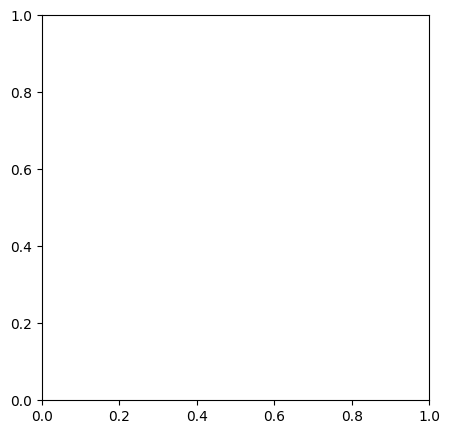

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():

    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)

def Update(i):

    init()
    ax.plot(x,T[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.plot(x,W[i,:],'--', label=r'W(x,%.2f)' %(t[i]))
    ax.legend()

Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)
plt.show()

In [13]:
HTML(Animation.to_html5_video())

In [25]:
for i in range(len(t)):
  a = np.max(T[i,:])

  if a > 0.3:
    tiempo = t[i]
    posicion = x[np.argmax(T[i,:])]
    break

In [26]:
tiempo


7.4674674674674675

In [27]:
posicion

0.7346938775510203